### Precision
Precision measures how many of the items your model labeled as positive were actually positive.
$$
Precision = \frac{True Positives}
{True Positives + False Positives}
$$

### Recall
Recall(true positive rate) measures how many of the actual positive cases your model successfully found.

$$
Recall = \frac{True Positives} {True Positives + False Negatives}
$$

### F1 score
The F1 score is the harmonic mean of Precision and Recall.

$$
F1 = 2 \frac{Precision ⋅ Recall}{Precision + Recall}
$$

### Example

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Running kn_c_pipeline...
Search complete.


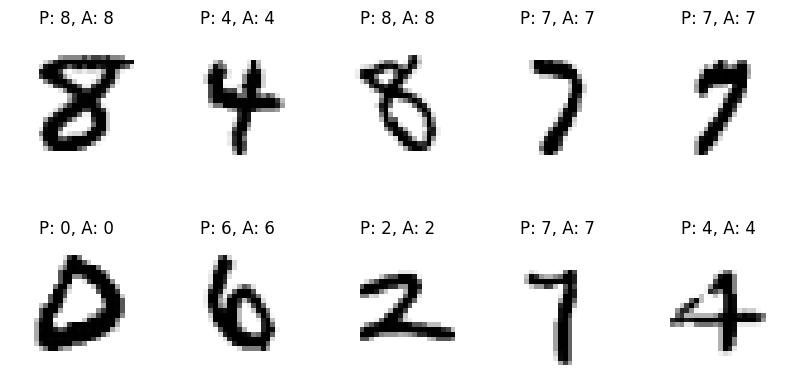

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

def scale_pixels(X):
    # Scale pixel values to [0.0, 1.0] range
    return np.asarray(X, dtype=np.float64) / 255.0

kn_c_pipeline = Pipeline(steps=[
    ('normalizer', FunctionTransformer(scale_pixels)),
    ('pca', PCA(n_components=0.95)), # Keep 95% of variance
    ("classifier", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='kd_tree', p=2))
])

print("Running kn_c_pipeline...")
kn_c_pipeline.fit(X_train, y_train)

y_pred = kn_c_pipeline.predict(X_test)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set_title(f"P: {y_pred[i]}, A: {y_test[i]}")
    ax.axis('off')
plt.show()




In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

